#Step 1: Import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Step 2: Load the dataset from a CSV file:

In [2]:
data = pd.read_csv('/content/drive/MyDrive/pip-datasets/House_Rent_Dataset.csv')
data.head()

BHK  Size            Floor    Area Type             Area Locality     City  \
0    2  1100  Ground out of 2   Super Area                    Bandel  Kolkata   
1    2   800       1 out of 3   Super Area  Phool Bagan, Kankurgachi  Kolkata   
2    2  1000       1 out of 3   Super Area   Salt Lake City Sector 2  Kolkata   
3    2   800       1 out of 2   Super Area               Dumdum Park  Kolkata   
4    2   850       1 out of 2  Carpet Area             South Dum Dum  Kolkata   

  Furnishing Status  Tenant Preferred  Bathroom   Rent  
0       Unfurnished  Bachelors/Family         2  10000  
1    Semi-Furnished  Bachelors/Family         1  20000  
2    Semi-Furnished  Bachelors/Family         1  17000  
3       Unfurnished  Bachelors/Family         1  10000  
4       Unfurnished         Bachelors         1   7500

#Step 3: Data cleaning and processing
# Perform any necessary data preprocessing steps, such as handling missing values or scaling features
# (For this example, let's assume the data is already preprocessed)
# Then separate the features (X) and target variable (y)

In [3]:
X = data.drop('Rent', axis=1)
y = data['Rent']

# Perform one-hot encoding on categorical columns
categorical_cols = ['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred']
encoder = OneHotEncoder(sparse=False)
# X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
# X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# # Concatenate the encoded categorical columns with the remaining numerical columns
# X_final = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)
X_encoded = encoder.fit_transform(X[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

# Concatenate the encoded categorical columns with the remaining numerical columns
X_final = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)
print(X_final,y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


      BHK  Size  Bathroom  Floor_1  Floor_1 out of 1  Floor_1 out of 10  \
0       2  1100         2      0.0               0.0                0.0   
1       2   800         1      0.0               0.0                0.0   
2       2  1000         1      0.0               0.0                0.0   
3       2   800         1      0.0               0.0                0.0   
4       2   850         1      0.0               0.0                0.0   
...   ...   ...       ...      ...               ...                ...   
4741    2  1000         2      0.0               0.0                0.0   
4742    3  2000         3      0.0               0.0                0.0   
4743    3  1750         3      0.0               0.0                0.0   
4744    3  1500         2      0.0               0.0                0.0   
4745    2  1000         2      0.0               0.0                0.0   

      Floor_1 out of 11  Floor_1 out of 12  Floor_1 out of 13  \
0                   0.0           

#Step 4: Exploratory Data Analysis (EDA) and Visualization

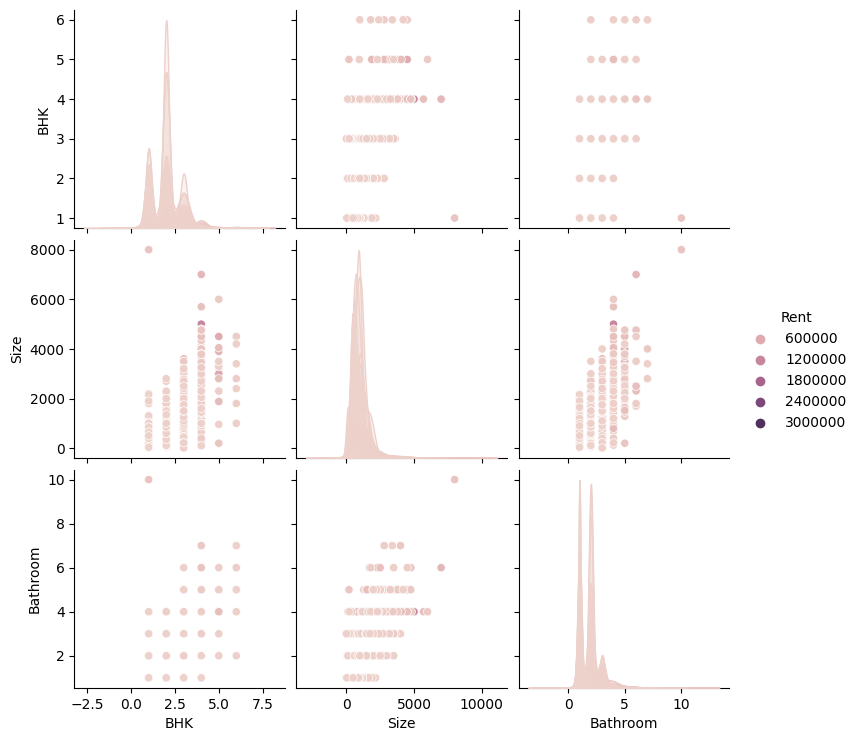

<ipython-input-4-3905a2efb703>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


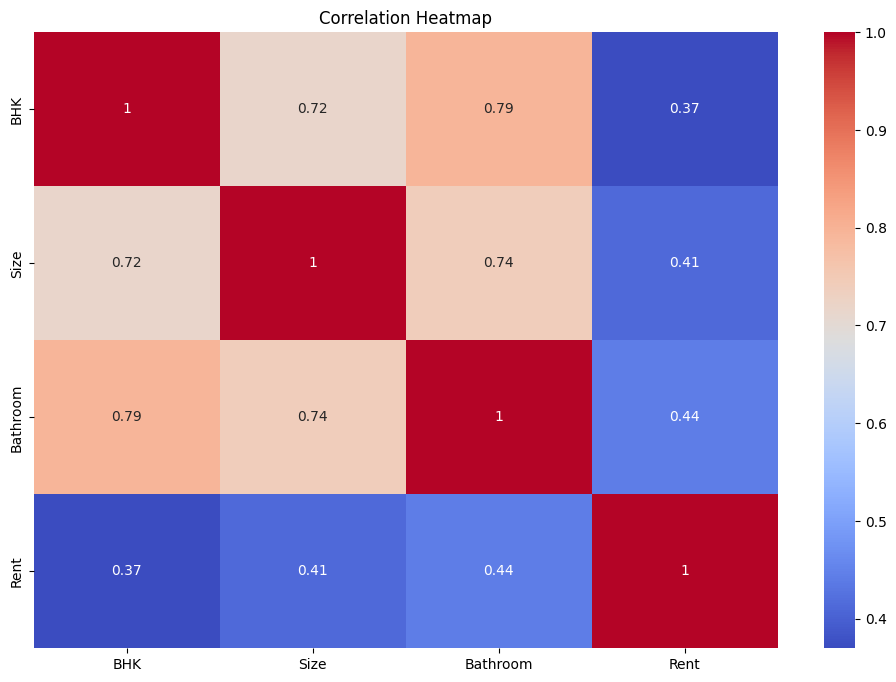

In [4]:
# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(data, hue='Rent')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Step 5: Train and test data split

In [6]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Step 6: Feature Importance Calculation

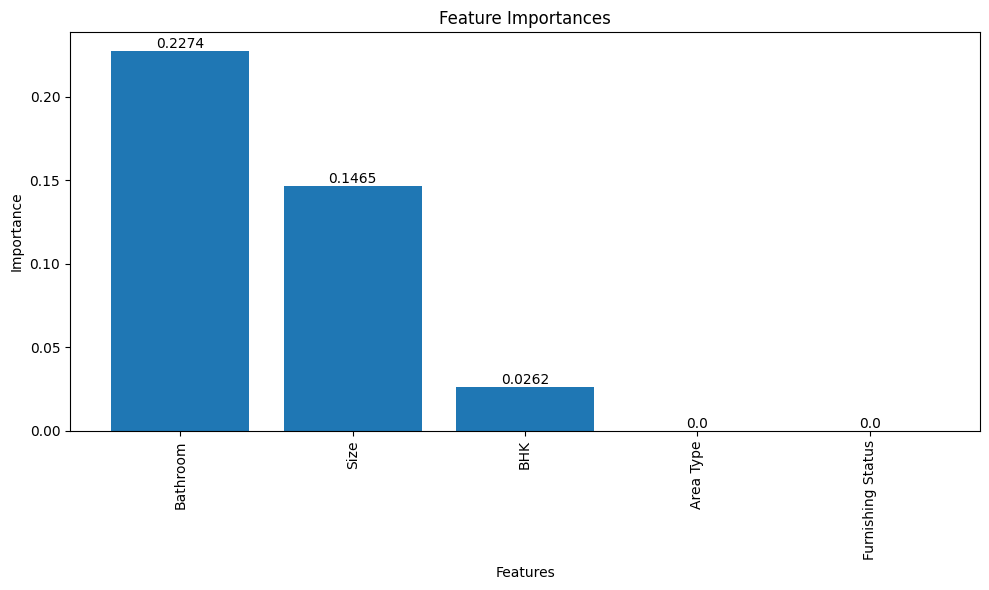

In [7]:
# rf_regressor = RandomForestRegressor()
# rf_regressor.fit(X_train, y_train)

# # Get feature importances
# importances = rf_regressor.feature_importances_
# feature_names = X_final.columns

# # Sort feature importances in descending order
# indices = importances.argsort()[::-1]

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.title("Feature Importances")
# plt.bar(range(X_final.shape[1]), importances[indices], align="center")
# plt.xticks(range(X_final.shape[1]), feature_names[indices], rotation=90)
# plt.tight_layout()
# plt.show()


model = RandomForestRegressor()
model.fit(X_train, y_train)

# Show in graphs
# Extract feature importances
# importances = model.feature_importances_

# # Get feature names
# feature_names = X_final.columns

# # Sort feature importances in descending order
# indices = np.argsort(importances)[::-1]

# # Rearrange feature names based on feature importances
# sorted_feature_names = [feature_names[i] for i in indices]

# # Plot the feature importances
# plt.figure(figsize=(10, 6))
# plt.title("Feature Importances")
# plt.bar(range(X_final.shape[1]), importances[indices])
# plt.xticks(range(X_final.shape[1]), sorted_feature_names, rotation=90)
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.tight_layout()
# plt.show()

# # Show in names and scores for all possible features

# importances = model.feature_importances_
# # Get feature names
# feature_names = X_final.columns
# # Create a DataFrame with feature names and importance scores
# feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# # Sort the DataFrame by importance scores in descending order
# feature_importances = feature_importances.sort_values('Importance', ascending=False)
# # Print the feature names and importance scores
# print(feature_importances)


# Importance for Select the desired features by column
# Select the desired features
selected_features = ['BHK', 'Size', 'Bathroom', 'Area Type', 'Furnishing Status']

# Extract feature importances for selected features
importances = model.feature_importances_
feature_names = X_final.columns

selected_importances = []
for feature in selected_features:
    if feature in feature_names:
        feature_index = np.where(feature_names == feature)[0][0]
        selected_importances.append(importances[feature_index])
    else:
        selected_importances.append(0)  # Assign 0 importance if feature not found

# Create a DataFrame with selected feature names and importance scores
selected_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': selected_importances})

# Sort the DataFrame by importance scores in descending order
selected_feature_importances = selected_feature_importances.sort_values('Importance', ascending=False)


# Plot the feature importances with values displayed inside the bars
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
bars = plt.bar(selected_feature_importances['Feature'], selected_feature_importances['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()



# # Plot the feature importances
# plt.figure(figsize=(10, 6))
# plt.title("Feature Importances")
# plt.bar(selected_feature_importances['Feature'], selected_feature_importances['Importance'])
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()



#Step 7: Model training with cross validation

Cross-Validation RMSE Scores: [ 38182.25810144  24117.15092161  27154.75225786 142207.81743465
  29488.47827086]
Mean Cross-Validation RMSE: 52230.091397283824


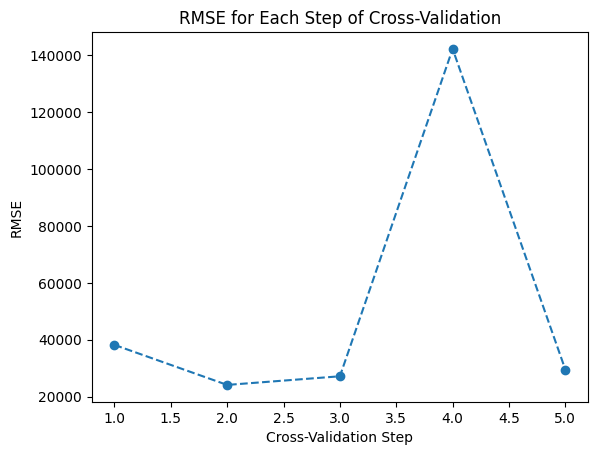

In [8]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

#Step 8: Model testing and evaluation

In [9]:
# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 2712612470.304412
Mean Absolute Error: 12867.014774937343


#Step 9: Model validation, prediction and evaluation

In [10]:
# Predict on the validation set
y_pred_val = rf_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 1928863539.9859169
Validation Mean Absolute Error: 11881.01202631579


#Step 9: Train Test Loss curves

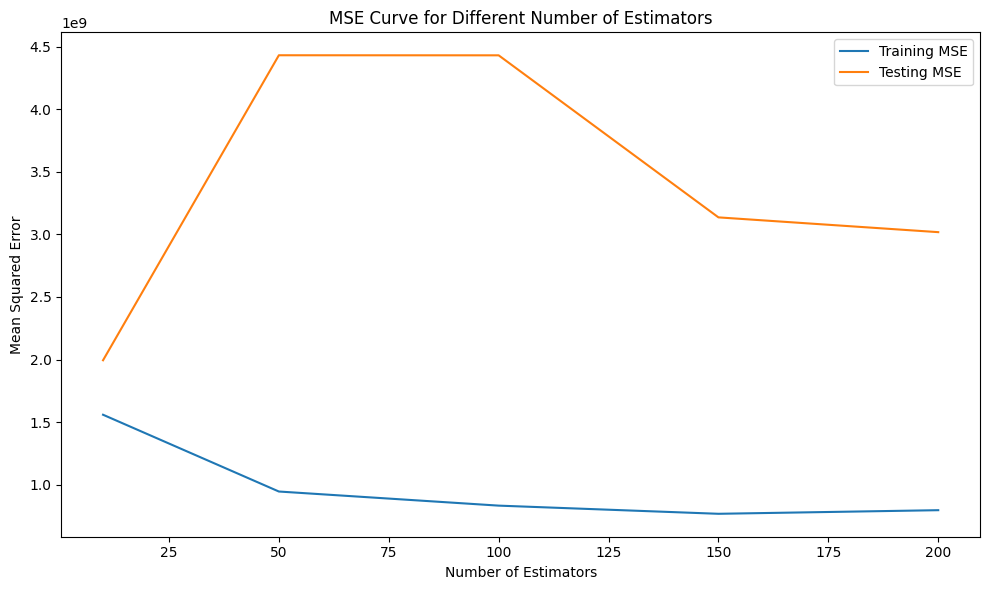

In [11]:
# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []

for n in num_estimators:
    # Train the random forest regression model
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()




In [ ]:
# Calculate the training set predictions
y_pred_train = rf_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Rent')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Rent': y_test, 'Predicted Rent': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Rent")
plt.plot(rent_comparison.index, rent_comparison['Actual Rent'], label='Actual Rent')
plt.plot(rent_comparison.index, rent_comparison['Predicted Rent'], label='Predicted Rent')
plt.xlabel("Samples")
plt.ylabel("Rent")
plt.legend()
plt.tight_layout()
plt.show()


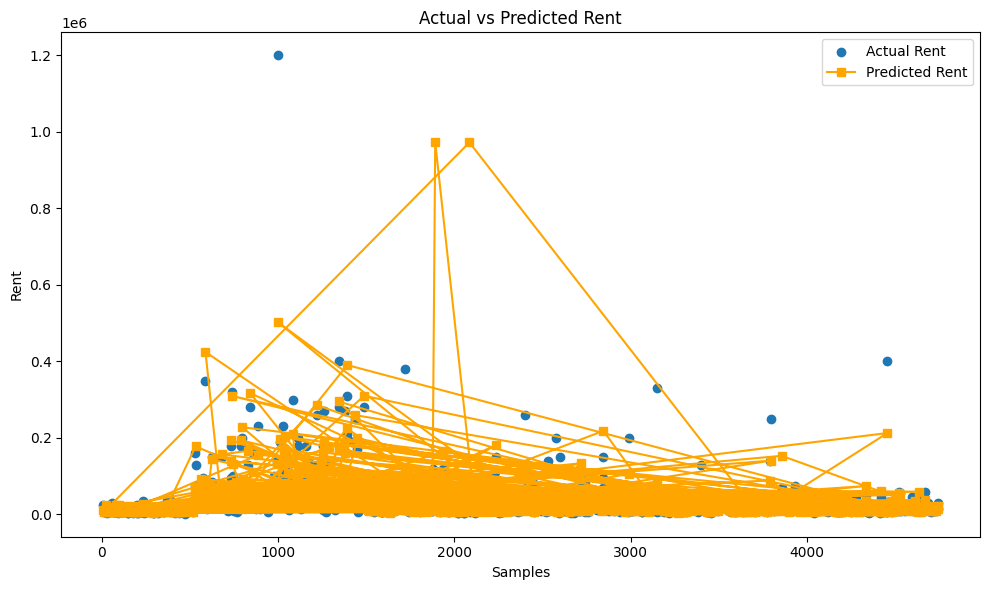

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Rent': y_test, 'Predicted Rent': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Rent")
plt.scatter(rent_comparison.index, rent_comparison['Actual Rent'], label='Actual Rent', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Rent'], label='Predicted Rent', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Rent")
plt.legend()
plt.tight_layout()
plt.show()
